# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob
import workspace_utils

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


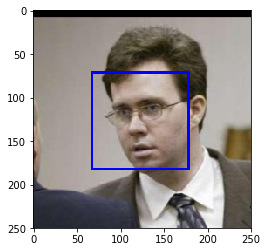

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[1])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)  
Percent of human images with detected faces: 98%  
Percent of dog images with detected faces: 11%

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
faces_in_human = 0
faces_in_dog = 0
for i in tqdm(range(len(human_files_short))):
    faces_in_human += int(face_detector(human_files_short[i]))
    faces_in_dog += int(face_detector(dog_files_short[i]))
    
print(f"Percent of human images with detected faces: {faces_in_human}%")
print(f"Percent of dog images with detected faces: {faces_in_dog}%")

100%|██████████| 100/100 [00:21<00:00,  4.68it/s]

Percent of human images with detected faces: 98%
Percent of dog images with detected faces: 11%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


HBox(children=(FloatProgress(value=0.0, max=553433881.0), HTML(value='')))

In [7]:
VGG16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [8]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    with torch.no_grad(): # Don't need gradient here. Speed things up a little bit.
        VGG16.eval() # VGG has dropout layers in the classifier
        image = Image.open(img_path).convert('RGB')

        # As specified in the torchvision.models documentations
        transform = transforms.Compose([
                            transforms.Resize(224),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                 std=[0.229, 0.224, 0.225])])

        transformed_image = transform(image).unsqueeze(0)
        if use_cuda:
            transformed_image = transformed_image.cuda()


        pred_output = VGG16(transformed_image)

        if use_cuda:
            pred_output = pred_output.cpu()
            
    VGG16.train()
        
    return pred_output.argmax().item() # predicted class index

In [9]:
path = "dogImages/train/002.Afghan_hound/Afghan_hound_00135.jpg"

a = VGG16_predict(path)
a

160

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [10]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    predicted_index = VGG16_predict(img_path)
    
    return 151 <= predicted_index and predicted_index <=268 # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__  
Percent of human images classfied as dog: 0%  
Percent of dog images classfied as dog: 100%

In [11]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

human_as_dog = 0
dog_as_dog = 0
for i in tqdm(range(len(human_files_short))):
    human_as_dog += int(dog_detector(human_files_short[i]))
    dog_as_dog += int(dog_detector(dog_files_short[i]))
    
print(f"Percent of human images classfied as dog: {human_as_dog}%")
print(f"Percent of dog images classfied as dog: {dog_as_dog}%")

100%|██████████| 100/100 [00:08<00:00, 11.69it/s]

Percent of human images classfied as dog: 0%
Percent of dog images classfied as dog: 100%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [12]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [13]:
import os
from torchvision import datasets, transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

batch_size = 64
dog_classes = 133

train_transforms = transforms.Compose([transforms.RandomRotation(30), # All/most of the images are straight
                                       transforms.RandomResizedCrop(224), 
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])


valid_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

train_set = datasets.ImageFolder("dogImages/train", transform=train_transforms)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

valid_set = datasets.ImageFolder("dogImages/test", transform=valid_transforms)
valid_loader = torch.utils.data.DataLoader(valid_set, batch_size=batch_size, shuffle=False)

test_set = datasets.ImageFolder("dogImages/test", transform=test_transforms)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

data_loaders = {"train":train_loader, "valid": valid_loader, "test":test_loader}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:  

All the images are resized to 224x224 and normalized as specified in the torchvision.models documentations.

The sets use different resize functions to provide more confidence that the model generalizes well.  
Train set uses a random resize then cropping to the required 224px.  
Validation and test sets both use a (deterministic) resize followed by a cropping to 224px.  

The training data was further augmented using a 30deg rotation because I observed in many of the training images that the pictures of the dog are "aligned horizontally".  
Then I also added a random horizontal flip, because the flipped image is still of a dog and may allow the model to pick up more pertinent features.  
No data augmentation is performaed on the validationd and test sets because I assume there is enough data to evaluate the model.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [14]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self, output_classes=dog_classes):
        super(Net, self).__init__()

        # Input 224 * 224 * 3
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        # Input 112 * 112 * 16
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # Input 56 * 56 * 32
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # Input 28 * 28 * 64
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        # Input 14 * 14 * 128
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1)
        
        # Routput half-sized images
        self.max_pool = nn.MaxPool2d(2, 2)
        
        self.bn1 = nn.BatchNorm2d(16)
        self.bn2 = nn.BatchNorm2d(32)
        self.bn3 = nn.BatchNorm2d(64)
        self.bn4 = nn.BatchNorm2d(128)
        self.bn5 = nn.BatchNorm2d(256)
        
        self.dropout = nn.Dropout(0.20)
        # n_channels * h * w of last conv layer
        self._channels_last = 256
        self._size_last = 7
        # Input 7 * 7 * 256
        self.fc1 = nn.Linear(self._size_last * self._size_last * self._channels_last, output_classes)
        
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.conv1(x))
        x = self.max_pool(x)
        x = self.bn1(x)

        x = F.relu(self.conv2(x))
        x = self.max_pool(x)
        x = self.bn2(x)

        x = F.relu(self.conv3(x))
        x = self.max_pool(x)
        x = self.bn3(x)

        x = F.relu(self.conv4(x))
        x = self.max_pool(x)
        x = self.bn4(x)

        x = F.relu(self.conv5(x))
        x = self.max_pool(x)
        x = self.bn5(x)

        # Flatten to feed in dense layer
        x = x.view(-1, self._size_last * self._size_last * self._channels_last)
        x = self.dropout(x)
        x = F.log_softmax(self.fc1(x), dim=1)
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=1

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.


__Answer:__ 
The input is a 224x224x3 image. 3 is for the RGB channels, and 224 is the size set in the data loader transform.

The model consists of 5 convolutional layers with a ReLU each followed by a max-pooling and batch-normalization layer.  

The number of convolutional filters is doubled at every layer, resulting in an increased number of channels while the pooling layers make them smaller, attempting to capture more higher level features.  
The batch-normalization will attempt to make the learning more stable by normalizing the outputs from the above and avoiding any excessive values.  

The output of the convolutional layers is then flattened to be fed to a dense layer, with dropout to avoid overfitting, followed by a softmax to get the log of probabilities for each of the 133 fog classes.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [15]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.NLLLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.003)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [44]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from workspace_utils import active_session

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path, dev_mode=False):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in tqdm(range(1, n_epochs+1)):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            if dev_mode and batch_idx > 3 :
                break
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        
            optimizer.zero_grad()
            log_prob = model(data)
            loss = criterion(log_prob, target)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * data.size(0)
        
        train_loss = train_loss / len(loaders["train"].dataset)
            
        ######################    
        # validate the model #
        ######################
        # Especially importnat because of the dropout
        model.eval()
        correct = 0.
        total = 0.
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(loaders['valid']):
                if dev_mode and batch_idx > 3 :
                    break
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                ## update the average validation loss
                log_prob = model(data)
                loss = criterion(log_prob, target)
                valid_loss += loss.item() * data.size(0)
                
                if epoch % 10 == 0:
                    pred = log_prob.data.max(1, keepdim=True)[1]
                    # compare predictions to true label
                    correct += np.sum(pred.eq(target.data.view_as(pred)).cpu().numpy())
                    total += data.size(0)

        valid_loss = valid_loss / len(loaders["valid"].dataset)
        
        # back to train mode, just in case.
        model.train()
        
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        if epoch % 10 == 0:
            print('\nValidation Accuracy: %2d%% (%2d/%2d)' % (100. * correct / total, correct, total))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print(f"Old loss ({valid_loss_min}), new loss({valid_loss}). Saving the model.")
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


In [45]:
# train the model
with active_session():
    model_scratch = train(11, data_loaders, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt', dev_mode=False)

  9%|▉         | 1/11 [01:51<18:39, 111.97s/it]

Epoch: 1 	Training Loss: 4.026702 	Validation Loss: 4.437287
Old loss (inf), new loss(4.437287465236974). Saving the model.


 18%|█▊        | 2/11 [03:44<16:48, 112.01s/it]

Epoch: 2 	Training Loss: 3.983388 	Validation Loss: 3.823242
Old loss (4.437287465236974), new loss(3.823242449874513). Saving the model.


 27%|██▋       | 3/11 [05:35<14:55, 111.88s/it]

Epoch: 3 	Training Loss: 3.873067 	Validation Loss: 3.951054


 36%|███▋      | 4/11 [07:27<13:02, 111.83s/it]

Epoch: 4 	Training Loss: 3.829788 	Validation Loss: 4.045092


 45%|████▌     | 5/11 [09:18<11:10, 111.75s/it]

Epoch: 5 	Training Loss: 3.750021 	Validation Loss: 3.700119
Old loss (3.823242449874513), new loss(3.700119057340485). Saving the model.


 55%|█████▍    | 6/11 [11:10<09:17, 111.56s/it]

Epoch: 6 	Training Loss: 3.666711 	Validation Loss: 3.799860


 64%|██████▎   | 7/11 [13:01<07:26, 111.58s/it]

Epoch: 7 	Training Loss: 3.603837 	Validation Loss: 3.762792


 73%|███████▎  | 8/11 [14:53<05:34, 111.59s/it]

Epoch: 8 	Training Loss: 3.583006 	Validation Loss: 3.587685
Old loss (3.700119057340485), new loss(3.587684857217889). Saving the model.


 82%|████████▏ | 9/11 [16:46<03:44, 112.08s/it]

Epoch: 9 	Training Loss: 3.483420 	Validation Loss: 3.420265
Old loss (3.587684857217889), new loss(3.4202651201823113). Saving the model.


 91%|█████████ | 10/11 [18:38<01:52, 112.11s/it]

Epoch: 10 	Training Loss: 3.448617 	Validation Loss: 3.610919

Validation Accuracy: 15% (127/836)


100%|██████████| 11/11 [20:30<00:00, 111.82s/it]

Epoch: 11 	Training Loss: 3.375219 	Validation Loss: 3.370897
Old loss (3.4202651201823113), new loss(3.3708968824176697). Saving the model.


In [46]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [59]:
# Added confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def test(loaders, model, criterion, use_cuda, dev_mode=False):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.
    
    predictions = torch.empty(0, 1)
    targets = torch.empty(0)

    model.eval()
    with torch.no_grad():
        for batch_idx, (data, target) in tqdm(enumerate(loaders['test'])):
            if dev_mode and batch_idx > 3:
                break
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # update average test loss 
            test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
            # convert output probabilities to predicted class
            pred = output.data.max(1, keepdim=True)[1]
            predictions = torch.cat((predictions, pred.cpu()), 0)
            targets = torch.cat((targets, target.cpu()), 0)
            # compare predictions to true label
            correct += np.sum(pred.eq(target.data.view_as(pred)).cpu().numpy())
            total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
    
    # Report
    targets = targets.detach().numpy()
    predictions = predictions.detach().numpy()    
    print(classification_report(targets, predictions))
#     ConfusionMatrixDisplay(confusion_matrix(targets, predictions)).plot()


In [61]:
# call test function
#with active_session():
test(data_loaders, model_scratch, criterion_scratch, use_cuda, dev_mode=False)

14it [00:10,  1.33it/s]

Test Loss: 3.419032


Test Accuracy: 20% (175/836)
             precision    recall  f1-score   support

        0.0       0.25      0.38      0.30         8
        1.0       0.00      0.00      0.00         8
        2.0       0.14      0.17      0.15         6
        3.0       0.23      0.38      0.29         8
        4.0       0.25      0.20      0.22        10
        5.0       0.38      0.38      0.38         8
        6.0       0.20      0.14      0.17         7
        7.0       0.00      0.00      0.00         8
        8.0       0.00      0.00      0.00         4
        9.0       0.00      0.00      0.00         6
       10.0       0.20      0.11      0.14         9
       11.0       0.25      0.11      0.15         9
       12.0       0.11      0.17      0.13         6
       13.0       0.00      0.00      0.00         9
       14.0       0.50      0.20      0.29        10
       15.0       0.22      0.25      0.24         8
       16.0       0.50      0.25      0.33     


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [62]:
## TODO: Specify data loaders
# Same as above

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [63]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture
model_transfer = models.vgg16(pretrained=True)
# Freeze
for param in model_transfer.features.parameters():
    param.requires_grad = False

# The new classifer
n_inputs = model_transfer.classifier[6].in_features
model_transfer.classifier[6] = nn.Linear(n_inputs,dog_classes)

if use_cuda:
    model_transfer = model_transfer.cuda()

In [64]:
model_transfer.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=133, bias=True)
)

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  
The model is based on a pretrained VGG16 model.  
The “features” layers are frozen and used as feature extractors.  
I retrained the whole “classifier” part by replacing the last dense layer with  a new one with re-initialized weights and output size 133.

In this project, we have a relatively small training data set, but they’re similar to ImageNet upon which VGG16 was pre-trained, they contain many dog images.  
So I am assuming that the first layers (“features” in particular) learned a lot of useful low-level representations for different kinds of images, and only need to-retrain the end of the neural network to specifically learn to distinguish between the dog breeds, and set the right number of classes.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [65]:
criterion_transfer = nn.CrossEntropyLoss()
# optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(), lr=0.003)
# It looks like SGD > Adam (https://bit.ly/3i5T41i)!
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(),lr=0.001,momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [67]:
# train the model
with active_session():
    model_transfer = train(20, data_loaders, model_transfer, optimizer_transfer, 
                       criterion_transfer, use_cuda, 'model_transfer.pt', dev_mode=False)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 	Training Loss: 3.326526 	Validation Loss: 0.947442
Old loss (inf), new loss(0.9474420413446198). Saving the model.


  5%|▌         | 1/20 [02:51<54:15, 171.36s/it]

Epoch: 2 	Training Loss: 1.504389 	Validation Loss: 0.565612
Old loss (0.9474420413446198), new loss(0.5656118960471815). Saving the model.


 10%|█         | 2/20 [05:42<51:24, 171.34s/it]

Epoch: 3 	Training Loss: 1.246227 	Validation Loss: 0.553255
Old loss (0.5656118960471815), new loss(0.5532554453639893). Saving the model.


 15%|█▌        | 3/20 [08:31<48:18, 170.48s/it]

Epoch: 4 	Training Loss: 1.156832 	Validation Loss: 0.482041
Old loss (0.5532554453639893), new loss(0.48204132985840575). Saving the model.


 25%|██▌       | 5/20 [14:11<42:35, 170.35s/it]

Epoch: 5 	Training Loss: 1.066403 	Validation Loss: 0.494501
Epoch: 6 	Training Loss: 1.033586 	Validation Loss: 0.480843
Old loss (0.48204132985840575), new loss(0.4808425703687531). Saving the model.


 30%|███       | 6/20 [17:02<39:46, 170.43s/it]

Epoch: 7 	Training Loss: 0.978409 	Validation Loss: 0.474491
Old loss (0.4808425703687531), new loss(0.47449075562531867). Saving the model.


 35%|███▌      | 7/20 [19:51<36:52, 170.16s/it]

Epoch: 8 	Training Loss: 0.994578 	Validation Loss: 0.410724
Old loss (0.47449075562531867), new loss(0.4107241984189412). Saving the model.


 45%|████▌     | 9/20 [25:23<30:45, 167.77s/it]

Epoch: 9 	Training Loss: 0.975619 	Validation Loss: 0.432602


 50%|█████     | 10/20 [28:06<27:43, 166.35s/it]

Epoch: 10 	Training Loss: 0.918736 	Validation Loss: 0.423868

Validation Accuracy: 86% (726/836)


 55%|█████▌    | 11/20 [30:49<24:49, 165.46s/it]

Epoch: 11 	Training Loss: 0.903645 	Validation Loss: 0.415261


 60%|██████    | 12/20 [33:32<21:56, 164.58s/it]

Epoch: 12 	Training Loss: 0.893700 	Validation Loss: 0.436269


 65%|██████▌   | 13/20 [36:13<19:05, 163.68s/it]

Epoch: 13 	Training Loss: 0.873332 	Validation Loss: 0.425276


 70%|███████   | 14/20 [38:54<16:16, 162.75s/it]

Epoch: 14 	Training Loss: 0.857293 	Validation Loss: 0.414754
Epoch: 15 	Training Loss: 0.855520 	Validation Loss: 0.408228
Old loss (0.4107241984189412), new loss(0.4082282950397599). Saving the model.


 75%|███████▌  | 15/20 [41:37<13:34, 162.85s/it]

Epoch: 16 	Training Loss: 0.817449 	Validation Loss: 0.387303
Old loss (0.4082282950397599), new loss(0.3873033471512452). Saving the model.


 85%|████████▌ | 17/20 [47:02<08:07, 162.46s/it]

Epoch: 17 	Training Loss: 0.854558 	Validation Loss: 0.413461


 90%|█████████ | 18/20 [49:45<05:25, 162.71s/it]

Epoch: 18 	Training Loss: 0.818186 	Validation Loss: 0.401824


 95%|█████████▌| 19/20 [52:30<02:43, 163.52s/it]

Epoch: 19 	Training Loss: 0.803226 	Validation Loss: 0.402965


100%|██████████| 20/20 [55:15<00:00, 165.80s/it]

Epoch: 20 	Training Loss: 0.803959 	Validation Loss: 0.392674

Validation Accuracy: 87% (733/836)


In [68]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [69]:
test(data_loaders, model_transfer, criterion_transfer, use_cuda, dev_mode=False)

14it [00:16,  1.21s/it]

Test Loss: 0.370185


Test Accuracy: 87% (731/836)
             precision    recall  f1-score   support

        0.0       1.00      0.75      0.86         8
        1.0       1.00      0.88      0.93         8
        2.0       0.75      1.00      0.86         6
        3.0       0.88      0.88      0.88         8
        4.0       0.91      1.00      0.95        10
        5.0       1.00      0.88      0.93         8
        6.0       0.78      1.00      0.88         7
        7.0       0.89      1.00      0.94         8
        8.0       1.00      0.75      0.86         4
        9.0       1.00      1.00      1.00         6
       10.0       1.00      0.89      0.94         9
       11.0       1.00      0.89      0.94         9
       12.0       1.00      0.67      0.80         6
       13.0       0.89      0.89      0.89         9
       14.0       1.00      1.00      1.00        10
       15.0       1.00      0.75      0.86         8
       16.0       0.80      1.00      0.89     

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [70]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_set.class_to_idx.keys()]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    model_transfer.eval() 
    with torch.no_grad(): # Don't need gradient here. Speed things up a little bit.
        image = Image.open(img_path).convert('RGB')

        # As specified in the torchvision.models documentations
        transform = transforms.Compose([
                            transforms.Resize(224),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                 std=[0.229, 0.224, 0.225])])

        transformed_image = transform(image).unsqueeze(0)
        if use_cuda:
            transformed_image = transformed_image.cuda()


        pred_output = model_transfer(transformed_image)
        breed_index = pred_output.data.max(1, keepdim=True)[1]

            
    model_transfer.train()
        
    return class_names[breed_index]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [72]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):        
    ## handle cases for a human face, dog, and neither
    if dog_detector(img_path):
         message = "Dog Detected!"
    elif face_detector(img_path):
        message = "Human Detected!"
    else:
        message= "No dog, no human. Ghost breed!"
    prediction = predict_breed_transfer(img_path)
    print(f"{message} {prediction}")


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)  
I am impressed with the results on the sample images.  
The results are better than I expected. Even with relatively small data and training epochs, and for such a complex problem which is difficult even for humans, the model’s performance in terms of accuracy is good.

Three possible improvements:  
1)Train for more epochs: The model was trained for 20 epochs, but the observed trend is that both the training and validation loss were decreasing. This suggests that.  
2)More training data, in particular for misclassified breeds. I further generated evaluation results per class, and we can see than some breeds (e.g. trilobite (69) or ptarmigan (81)) have the lowest precision. So possibly by adding more data the model would learn better.  
3)Optimization algorithm and hyperparameters. I initially trained the model using Adam optimizer but the accuracy was under 10%. ThenI tried with SGD (https://bit.ly/3i5T41i) which result in a much better performance. I could still further experiment tuning the optimizer’s learning rate in hope of a better performance.


Human Detected! Ibizan hound


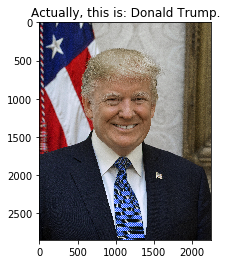

Dog Detected! Havanese


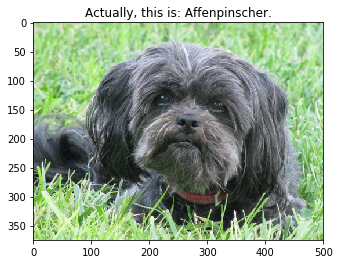

Dog Detected! Labrador retriever


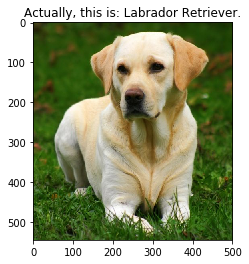

Dog Detected! Brittany


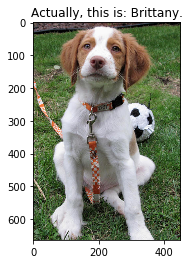

Dog Detected! Dogue de bordeaux


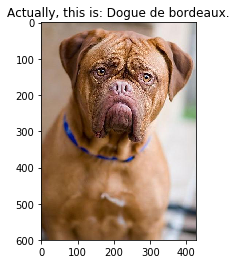

Dog Detected! German shepherd dog


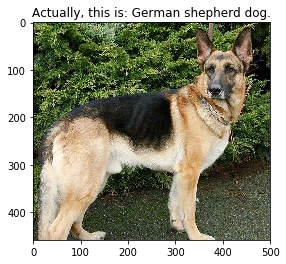

No dog, no human. Ghost breed! Cardigan welsh corgi


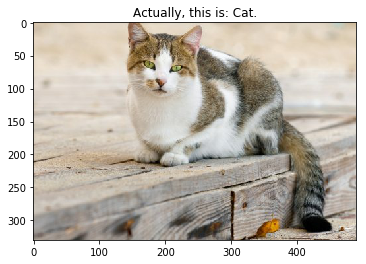

Dog Detected! Boxer


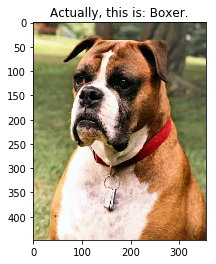

No dog, no human. Ghost breed! Pembroke welsh corgi


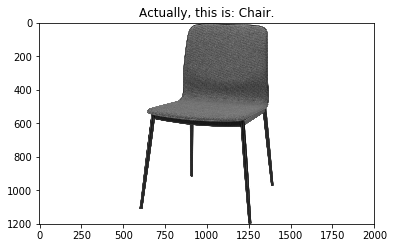

Human Detected! Afghan hound


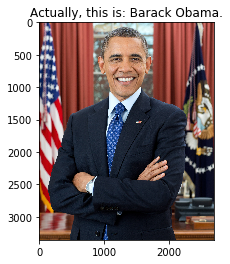

In [74]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
from os import path

test_images = np.array(glob("test_images/*"))

## suggested code, below
for image_path in test_images:
    run_app(image_path)
    image = Image.open(image_path)
    actual = path.splitext(path.basename(image_path))[0]
    plt.title(f"Actually, this is: {actual}.")
    plt.imshow(image)
    plt.show()
